# House Grade Prediction Case Study

Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Importing train and test dataset

In [2]:
train_data= pd.read_csv('train_hgp.csv')
test_data= pd.read_csv('test_hgp.csv')

In [3]:
train_data.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


In [4]:
test_data.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$


In [5]:
print(train_data.shape)
print(test_data.shape)

(7000, 14)
(3299, 13)


Merging train and test dataset

In [6]:
dataset = train_data.append(test_data, ignore_index=True, sort=False)
dataset.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


Now let's have a look on the dataset

In [7]:
dataset.shape

(10299, 14)

In [8]:
dataset.columns

Index(['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

In [9]:
dataset.nunique()

id             7000
Area(total)      71
Troom             5
Nbedrooms         7
Nbwashrooms       7
Twashrooms        6
roof              4
Roof(Area)       51
Lawn(Area)       41
Nfloors           8
API              41
ANB               6
Grade             5
EXPECTED       2198
dtype: int64

Displaying unique values of each column

In [10]:
cols=['id', 'Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED']
for cols in dataset:
    print(cols)
    print(dataset[cols].unique())

id
[   1    2    3 ... 6998 6999 7000]
Area(total)
[305 344 294 328 295 335 322 346 298 329 304 307 316 351 312 318 359 339
 291 313 348 349 357 336 301 311 309 337 334 360 347 319 356 315 355 317
 302 296 343 330 338 290 321 333 352 350 354 306 342 324 331 293 320 303
 300 353 332 297 326 323 327 340 292 358 314 299 308 325 310 341 345]
Troom
[ 8.  6.  5.  9.  7. nan]
Nbedrooms
[ 2.  7.  4.  5.  6.  3.  8. nan]
Nbwashrooms
[ 1.  7.  3.  2.  5.  4.  6. nan]
Twashrooms
[ 3.  8.  4.  5.  7.  6. nan]
roof
['NO' 'no' 'yes' nan 'YES']
Roof(Area)
[  0.  97.  nan 112.  83.  72.  92.  77.  94. 108. 102. 106.  95.  80.
 118.  74.  78.  85.  98. 109. 113.  84. 101. 100. 119.  75. 103.  71.
  88. 120. 114.  82.  96.  91. 105. 111.  76.  90.  81. 107. 115.  86.
  87. 110.  73. 104.  89.  93. 116. 117.  79.  99.]
Lawn(Area)
[ 76.  83.  78.  91.  97.  99.  87. 103.  79.  81.  94. 106.  90.  86.
  80.  89.  92. 104.  73. 107.  72.  75.  98. 102. 108.  96.  70.  88.
 105.  77.  74.  93. 100.  71.  85.

### Preparing  Dataset

In [11]:
dataset.isnull().sum()

id                0
Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
Grade          3299
EXPECTED          0
dtype: int64

There are null values in dataset

In [12]:
cols_n=['Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms','Lawn(Area)', 'API']
for cols_n in dataset:
    print(cols_n)
    print(dataset[cols_n].value_counts())

id
2047    2
1051    2
1027    2
3082    2
1035    2
       ..
4777    1
6824    1
6829    1
4769    1
3427    1
Name: id, Length: 7000, dtype: int64
Area(total)
334    178
318    176
290    176
322    164
320    162
      ... 
338    129
329    129
354    123
348    118
315    111
Name: Area(total), Length: 71, dtype: int64
Troom
9.0    2095
5.0    2081
7.0    2066
6.0    2028
8.0    2026
Name: Troom, dtype: int64
Nbedrooms
4.0    2037
6.0    2029
5.0    2023
3.0    1416
7.0    1401
2.0     696
8.0     693
Name: Nbedrooms, dtype: int64
Nbwashrooms
3.0    2090
5.0    2080
4.0    2026
6.0    1540
2.0    1526
7.0     523
1.0     511
Name: Nbwashrooms, dtype: int64
Twashrooms
4.0    2113
6.0    2078
7.0    2069
5.0    2021
8.0    1019
3.0     998
Name: Twashrooms, dtype: int64
roof
no     2100
NO     2095
yes    2063
YES    2035
Name: roof, dtype: int64
Roof(Area)
0.0      4195
84.0      108
88.0       99
112.0      95
80.0       95
105.0      94
117.0      94
95.0       93
90.0       92


In [13]:
for column in ['Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms']:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

dataset['Lawn(Area)']= dataset['Lawn(Area)'].fillna(round(dataset['Lawn(Area)'].mean()))
dataset['API']=dataset['API'].fillna(round(dataset['API'].mean()))

In [14]:
dataset.isnull().sum()

id                0
Area(total)       0
Troom             0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof           2006
Roof(Area)     2006
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Grade          3299
EXPECTED          0
dtype: int64

In [15]:
dataset['roof'].unique()

array(['NO', 'no', 'yes', nan, 'YES'], dtype=object)

In [16]:
dataset.at[dataset['roof']=='NO','roof']=0
dataset.at[dataset['roof']=='YES','roof']=1
dataset.at[dataset['roof']=='yes','roof']=1
dataset.at[dataset['roof']=='no','roof']=0

In [17]:
dataset['roof'].unique()

array([0, 1, nan], dtype=object)

In [18]:
dataset.drop(['Roof(Area)'], axis=1, inplace=True)

In [19]:
dataset['EXPECTED'].unique()

array(['3826$', '4458$', '4199$', ..., '2855$', '3344$', '4656$'],
      dtype=object)

Removing dollar sign

In [20]:
dataset['EXPECTED']=dataset['EXPECTED'].replace({'\$':''}, regex=True)

#### Seperating train and test data

In [21]:
train_d = dataset.iloc[:7000]
test_d = dataset.iloc[7000:]

In [22]:
test_d.drop(['Grade'], axis=1, inplace=True)

In [23]:
print(train_d.shape)
print(test_d.shape)

(7000, 13)
(3299, 12)


In [24]:
train_d.isnull().sum()

id                0
Area(total)       0
Troom             0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof           1353
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [25]:
train_d.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,0,76.0,2,63.0,4,D,3826
1,2,344,6.0,7.0,7.0,8.0,0,83.0,7,97.0,1,B,4458
2,3,294,8.0,4.0,3.0,4.0,1,78.0,1,88.0,4,C,4199
3,4,328,5.0,4.0,2.0,4.0,0,91.0,5,86.0,1,D,3462
4,5,295,9.0,5.0,3.0,5.0,NaN,97.0,4,93.0,3,C,4543


In [26]:
train_d['Grade'].unique()

array(['D', 'B', 'C', 'A', 'E'], dtype=object)

In [27]:
train_d['Grade_n'],_= pd.factorize(train_d['Grade'],sort=True)

In [28]:
train_d.drop(['Grade','id','Nbwashrooms'], axis=1, inplace=True)

In [29]:
imputer = KNNImputer(n_neighbors=1, weights="uniform")
train_d=imputer.fit_transform(train_d)
train_d=pd.DataFrame(train_d)

In [30]:
train_d.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [31]:
train_d.head()

,0,1,2,3,4,5,6,7,8,9,10
0,305.0,8.0,2.0,3.0,0.0,76.0,2.0,63.0,4.0,3826.0,3.0
1,344.0,6.0,7.0,8.0,0.0,83.0,7.0,97.0,1.0,4458.0,1.0
2,294.0,8.0,4.0,4.0,1.0,78.0,1.0,88.0,4.0,4199.0,2.0
3,328.0,5.0,4.0,4.0,0.0,91.0,5.0,86.0,1.0,3462.0,3.0
4,295.0,9.0,5.0,5.0,1.0,97.0,4.0,93.0,3.0,4543.0,2.0


In [32]:
train_d.columns = ['Area(total)', 'Troom', 'Nbedrooms', 'Twashrooms',
       'roof', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED','Grade']
train_d.head()

,Area(total),Troom,Nbedrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
0,305.0,8.0,2.0,3.0,0.0,76.0,2.0,63.0,4.0,3826.0,3.0
1,344.0,6.0,7.0,8.0,0.0,83.0,7.0,97.0,1.0,4458.0,1.0
2,294.0,8.0,4.0,4.0,1.0,78.0,1.0,88.0,4.0,4199.0,2.0
3,328.0,5.0,4.0,4.0,0.0,91.0,5.0,86.0,1.0,3462.0,3.0
4,295.0,9.0,5.0,5.0,1.0,97.0,4.0,93.0,3.0,4543.0,2.0


In [33]:
test_d.head()

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,EXPECTED
7000,1,348,9.0,5.0,3.0,5.0,NaN,84.0,5,91.0,6,4422
7001,2,311,6.0,5.0,5.0,6.0,0,86.0,6,83.0,4,3432
7002,3,342,5.0,6.0,6.0,7.0,1,85.0,4,95.0,5,4066
7003,4,329,7.0,7.0,4.0,6.0,NaN,105.0,5,97.0,6,4322
7004,5,307,6.0,2.0,3.0,4.0,0,76.0,2,64.0,4,3031


In [34]:
test_d.drop(['id','Nbwashrooms'], axis=1, inplace=True)

In [35]:
test_d.isnull().sum()

Area(total)      0
Troom            0
Nbedrooms        0
Twashrooms       0
roof           653
Lawn(Area)       0
Nfloors          0
API              0
ANB              0
EXPECTED         0
dtype: int64

In [36]:
imputer = KNNImputer(n_neighbors=1, weights="uniform")
test_d=imputer.fit_transform(test_d)
test_d=pd.DataFrame(test_d)

In [37]:
test_d.head()

,0,1,2,3,4,5,6,7,8,9
0,348.0,9.0,5.0,5.0,0.0,84.0,5.0,91.0,6.0,4422.0
1,311.0,6.0,5.0,6.0,0.0,86.0,6.0,83.0,4.0,3432.0
2,342.0,5.0,6.0,7.0,1.0,85.0,4.0,95.0,5.0,4066.0
3,329.0,7.0,7.0,6.0,1.0,105.0,5.0,97.0,6.0,4322.0
4,307.0,6.0,2.0,4.0,0.0,76.0,2.0,64.0,4.0,3031.0


In [38]:
test_d.columns = ['Area(total)', 'Troom', 'Nbedrooms', 'Twashrooms',
       'roof', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED']
test_d.head()

,Area(total),Troom,Nbedrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,EXPECTED
0,348.0,9.0,5.0,5.0,0.0,84.0,5.0,91.0,6.0,4422.0
1,311.0,6.0,5.0,6.0,0.0,86.0,6.0,83.0,4.0,3432.0
2,342.0,5.0,6.0,7.0,1.0,85.0,4.0,95.0,5.0,4066.0
3,329.0,7.0,7.0,6.0,1.0,105.0,5.0,97.0,6.0,4322.0
4,307.0,6.0,2.0,4.0,0.0,76.0,2.0,64.0,4.0,3031.0


In [39]:
summary_roof=pd.concat([pd.crosstab(train_d[x], train_d.roof) for x in train_d.columns[10:11]], keys=train_d.columns[10:11])
summary_roof

roof          0.0   1.0
      Grade            
Grade 0.0     137   305
      1.0     597   878
      2.0    1453  1475
      3.0    1314   815
      4.0      26     0

In order to get a better understanding of our data, we decided to explore it visually

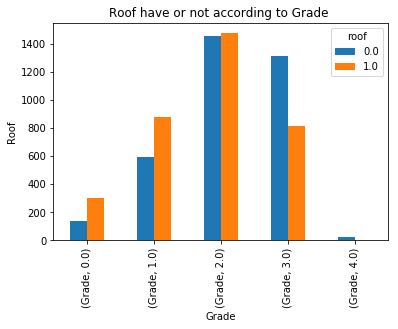

In [40]:
summary_roof.plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Roof')
plt.title('Roof have or not according to Grade ')
plt.show()

Text(0.5,1,'Area')

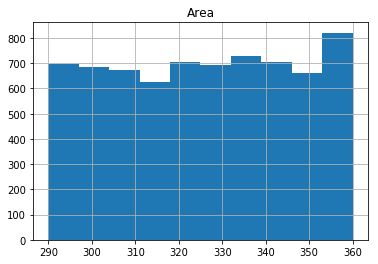

In [41]:
train_d['Area(total)'].hist()
plt.title('Area')

Text(0.5,1,'Grade')

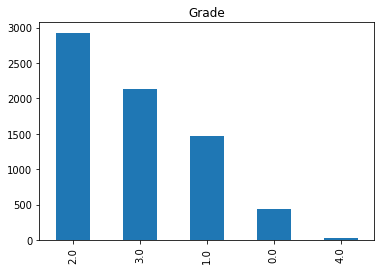

In [42]:
train_d['Grade'].value_counts().plot(kind='bar')
plt.title('Grade')

# Splitting dataset

In [43]:
X=train_d[['Area(total)','Troom', 'Nbedrooms', 'Twashrooms', 'roof', 'Lawn(Area)', 'Nfloors', 'API', 'EXPECTED']]
y=train_d['Grade']

X1=test_d[['Area(total)','Troom', 'Nbedrooms', 'Twashrooms', 'roof', 'Lawn(Area)', 'Nfloors', 'API', 'EXPECTED']]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Random Forest Model

In [45]:
model_rf = RandomForestClassifier(criterion='entropy',random_state = 1,n_estimators = 40)
model_rf.fit(X_train, y_train)

y_test_pred_rf = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

acc_rf="{0:.2f}%".format(100*accuracy_score(y_test_pred_rf, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_rf, y_test)))
print(confusion_matrix(y_test, y_test_pred_rf))
cv_rf = cross_val_score(model_rf, X_train, y_train, cv=5)
print("rf cross val score:-",round(cv_rf.mean(), 2) * 100)
print(classification_report(y_test, y_test_pred_rf))

Accuracy 85.57%
[[ 90  43   0   0   0]
 [ 13 351  65   0   0]
 [  0  39 748  58   0]
 [  0   0  76 605   0]
 [  0   0   0   9   3]]
rf cross val score:- 87.0
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76       133
         1.0       0.81      0.82      0.81       429
         2.0       0.84      0.89      0.86       845
         3.0       0.90      0.89      0.89       681
         4.0       1.00      0.25      0.40        12

    accuracy                           0.86      2100
   macro avg       0.89      0.70      0.75      2100
weighted avg       0.86      0.86      0.85      2100



In [46]:
from sklearn.model_selection import GridSearchCV

parameters=[{'n_estimators' : [10,20,30,40,50,60,70,80,90], 'criterion' : ['entropy'],'random_state':[0,1,2]},
           {'n_estimators' : [10,20,30,40,50,60,70,80,90], 'criterion' : ['gini'],'random_state':[0,1,2]}]

grid_search= GridSearchCV(estimator= model_rf,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)

grid_search=grid_search.fit(X_train,y_train)
best_accuracy_rf=grid_search.best_score_
best_parameters_rf=grid_search.best_params_

In [47]:
print(best_accuracy_rf)
print(best_parameters_rf)

0.8704081632653061
{'criterion': 'entropy', 'n_estimators': 40, 'random_state': 1}


# KNN Model

In [48]:
model_knn = KNeighborsClassifier(n_neighbors=80)
model_knn.fit(X_train, y_train)

y_test_pred_knn = model_knn.predict(X_test)
score = model_knn.score(X_test, y_test)

acc_knn="{0:.2f}%".format(100*accuracy_score(y_test_pred_knn, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_knn, y_test)))
print(confusion_matrix(y_test, y_test_pred_knn))
cv_knn = cross_val_score(model_knn, X_train, y_train, cv=5)
print("knn cross val score:-",round(cv_knn.mean(), 2) * 100)
print(classification_report(y_test, y_test_pred_knn))

Accuracy 63.29%
[[ 57  70   6   0   0]
 [ 25 208 196   0   0]
 [  0  73 687  85   0]
 [  0   0 304 377   0]
 [  0   0   0  12   0]]
knn cross val score:- 67.0
              precision    recall  f1-score   support

         0.0       0.70      0.43      0.53       133
         1.0       0.59      0.48      0.53       429
         2.0       0.58      0.81      0.67       845
         3.0       0.80      0.55      0.65       681
         4.0       0.00      0.00      0.00        12

    accuracy                           0.63      2100
   macro avg       0.53      0.46      0.48      2100
weighted avg       0.65      0.63      0.63      2100



In [49]:
parameters=[{'n_neighbors':[10,20,30,40,50,60,70,80,90]}]

grid_search= GridSearchCV(estimator= model_knn,param_grid=parameters,scoring='accuracy',cv=5,n_jobs= -1)

grid_search=grid_search.fit(X_train, y_train)
best_accuracy_knn=grid_search.best_score_
best_parameters_knn=grid_search.best_params_

In [50]:
print(best_accuracy_knn)
print(best_parameters_knn)

0.6659183673469388
{'n_neighbors': 80}


# SVC Model

In [51]:
model_svc = SVC(kernel = 'rbf',gamma=0.1, random_state=0)
model_svc.fit(X_train, y_train)

y_test_pred_svc = model_svc.predict(X_test)
score = model_svc.score(X_test, y_test)

acc_svc="{0:.2f}%".format(100*accuracy_score(y_test_pred_svc, y_test))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test_pred_svc, y_test)))
print(confusion_matrix(y_test, y_test_pred_svc))
cv_svc = cross_val_score(model_svc, X_train, y_train, cv=5)
print("svc cross val score:-",round(cv_svc.mean(), 2) * 100)
print(classification_report(y_test, y_test_pred_svc))


Accuracy 40.33%
[[  0   0 133   0   0]
 [  0   0 429   0   0]
 [  0   0 845   0   0]
 [  0   0 679   2   0]
 [  0   0  12   0   0]]
svc cross val score:- 43.0
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       133
         1.0       0.00      0.00      0.00       429
         2.0       0.40      1.00      0.57       845
         3.0       1.00      0.00      0.01       681
         4.0       0.00      0.00      0.00        12

    accuracy                           0.40      2100
   macro avg       0.28      0.20      0.12      2100
weighted avg       0.49      0.40      0.23      2100



In [52]:
parameters = [{'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3]}]

grid_search = GridSearchCV(estimator = model_svc,param_grid = parameters,scoring = 'accuracy',cv = 5,n_jobs = -1)

grid_search=grid_search.fit(X_train, y_train)
best_accuracy_svc=grid_search.best_score_
best_parameters_svc=grid_search.best_params_

In [53]:
print(best_accuracy_svc)
print(best_parameters_svc)

0.4273469387755101
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


### Running model on test data and generating predictions with Random Forest classifier Model as it is giving the better accuracy precision

In [54]:
y_predictions = model_rf.predict(X1)

In [55]:
test_d["Grade"]=y_predictions

In [56]:
test_d["EXPECTED"]=test_d["EXPECTED"].astype(str)+"$"

test_d.at[test_d['Grade']==0,'Grade']='A'
test_d.at[test_d['Grade']==1,'Grade']='B'
test_d.at[test_d['Grade']==2,'Grade']='C'
test_d.at[test_d['Grade']==3,'Grade']='D'
test_d.at[test_d['Grade']==4,'Grade']='E'

test_d.head()

,Area(total),Troom,Nbedrooms,Twashrooms,roof,Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
0,348.0,9.0,5.0,5.0,0.0,84.0,5.0,91.0,6.0,4422.0$,B
1,311.0,6.0,5.0,6.0,0.0,86.0,6.0,83.0,4.0,3432.0$,D
2,342.0,5.0,6.0,7.0,1.0,85.0,4.0,95.0,5.0,4066.0$,C
3,329.0,7.0,7.0,6.0,1.0,105.0,5.0,97.0,6.0,4322.0$,C
4,307.0,6.0,2.0,4.0,0.0,76.0,2.0,64.0,4.0,3031.0$,D


In [57]:
test_d.to_csv('Prediction.csv')